# <span style="color:green"> Numerical Simulation Laboratory </span>
## <span style="color:brown"> Python Exercise 11 </span>
## <span style="color:orange"> Keras - Neural Network regression </span>

### Overview 

In this notebook our task will be to perform machine learning regression on noisy data with a Neural Network (NN).

We will explore how the ability to fit depends on the structure of the NN. The goal is also to build intuition about why prediction is difficult.

In [2]:
# import tensorflow as tf
# import os
# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
# tf.__version__

### The Prediction Problem

Consider a probabilistic process that gives rise to labeled data $(x,y)$. The data is generated by drawing samples from the equation

$$
    y_i= f(x_i) + \eta_i,
$$

where $f(x_i)$ is some fixed, but (possibly unknown) function, and $\eta_i$ is a Gaussian, uncorrelate noise variable such that

$$
\langle \eta_i \rangle=0 \\
\langle \eta_i \eta_j \rangle = \delta_{ij} \sigma
$$

We will refer to the $f(x_i)$ as the **true features** used to generate the data. 

To make predictions, we will consider a NN that depends on its parameters, weights and biases. The functions that the NN can model respresent the **model class** that we are using to try to model the data and make predictions.

To learn the parameters of the NN, we will train our models on a **training data set** and then test the effectiveness of the NN on a *different* dataset, the **validation data set**. The reason we must divide our data into a training and test dataset is that the point of machine learning is to make accurate predictions about new data we have not seen.

To measure our ability to predict, we will learn our parameters by fitting our training dataset and then making predictions on our test data set. One common measure of predictive  performance of our algorithm is to compare the predictions,$\{y_j^\mathrm{pred}\}$, to the true values $\{y_j\}$. A commonly employed measure for this is the sum of the mean square-error (MSE) on the test set:
$$
MSE= \frac{1}{N_\mathrm{test}}\sum_{j=1}^{N_\mathrm{test}} (y_j^\mathrm{pred}-y_j)^2
$$

We will try to get a qualitative picture by examining plots on validation and training data.

### Linear fit

We start by considering the very simple case:
$$
f(x)=2x+1
$$

Let's start defining the parameters of an ideal linear function which we are going to predict through a neural network regression

In [3]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

Now let's generate a set of input data which will slightly deviate from our ideal behaviour using a random noise (that actually is set to zero):

In [4]:
import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 1000)
x_valid = np.random.uniform(-1, 1, 100)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 1.0 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

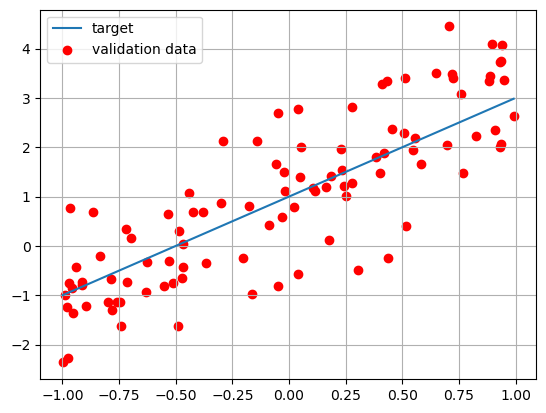

In [5]:
# plot validation and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

If you remember how a single node of a neural network works, you can easily spot that **just a single neuron can make the job**. So let's start using a simple Sequential model with just one layer on one neuron only!

In [7]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [8]:
# get a summary of our composed model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


We are now going to train our model, that is we feed the neuron with the set of training pair x, y_train from which the optimizer will find the best weights to minimize the Mean Square Error loss function (out linear regression function).

In [9]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=10, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/30
100/100 [==============================] - 3s 11ms/step - loss: 1.6071 - mse: 1.6071 - val_loss: 1.1831 - val_mse: 1.1831
Epoch 2/30
100/100 [==============================] - 1s 6ms/step - loss: 1.0605 - mse: 1.0605 - val_loss: 0.9399 - val_mse: 0.9399
Epoch 3/30
100/100 [==============================] - 1s 6ms/step - loss: 0.9763 - mse: 0.9763 - val_loss: 0.8660 - val_mse: 0.8660
Epoch 4/30
100/100 [==============================] - 1s 5ms/step - loss: 0.9558 - mse: 0.9558 - val_loss: 0.8382 - val_mse: 0.8382
Epoch 5/30
100/100 [==============================] - 1s 6ms/step - loss: 0.9521 - mse: 0.9521 - val_loss: 0.8300 - val_mse: 0.8300
Epoch 6/30
100/100 [==============================] - 0s 5ms/step - loss: 0.9504 - mse: 0.9504 - val_loss: 0.8259 - val_mse: 0.8259
Epoch 7/30
100/100 [==============================] - 0s 5ms/step - loss: 0.9501 - mse: 0.9501 - val_loss: 0.8225 - val_mse: 0.8225
Epoch 8/30
100/100 [==============================] - 0s 5ms/step - loss: 0

By looking at weights and biases we can see if the linear fit was successfull: $w_1$ represents the angular coefficient, $b$ the intercept.

In [10]:
# return weights and biases
model.get_weights()

[array([[2.0100238]], dtype=float32), array([1.0270193], dtype=float32)]

In [11]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

4/4 [==============================] - 0s 10ms/step - loss: 0.8203 - mse: 0.8203

Test loss: 0.8202770352363586
Test accuracy: 0.8202770352363586


In [12]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

4/4 [==============================] - 0s 8ms/step - loss: 7.4786e-04 - mse: 7.4786e-04

Test loss: 0.0007478618645109236
Test accuracy: 0.0007478618645109236


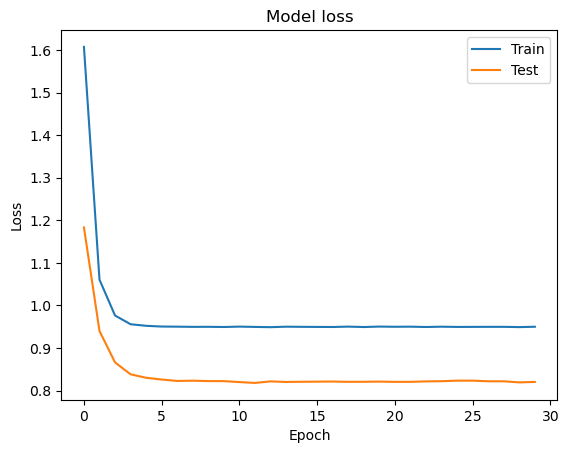

In [13]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

4/4 [==============================] - 0s 5ms/step
(100, 1)


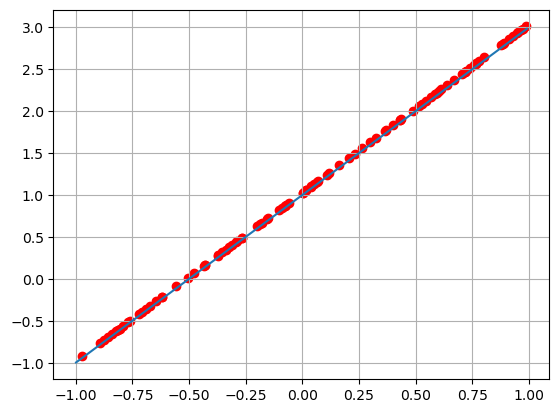

In [14]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
print(y_predicted.shape)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

### Exercise 11.1

In order to make practice with NN, explore how does the previous linear regression depend on the number of epochs, $N_{\mathrm{epochs}}$, the number of data points $N_{\mathrm{train}}$ and on the noise $\sigma$. Try to improve the previous result operating on these parameters.

### Exercise 11.2

Try to extend the model to obtain a reasonable fit of the following polynomial of order 3:

$$
f(x)=4-3x-2x^2+3x^3
$$
for $x \in [-1,1]$.

Find good (& reasonable) choices for:

- the number of layers
- the number of neurons in each layer
- the activation function
- the optimizer
- the loss function
  
Check your NN model by seeing how well your fits predict newly generated test data (including on data outside the range you fit. How well do your NN do on points in the range of $x$ where you trained the model? How about points outside the original training data set? 
Summarize what you have learned about the relationship between model complexity (number of parameters), goodness of fit on training data, and the ability to predict well.

We start defining the target parameters of the model we want to predict, in this case the coefficients of a third order polynomial.

In [15]:
# we define the target parameters
a = 4
b = -3
c = -2
d = 3

# we define the polynomial function

def function(x):
    return a + b * x + c * x * x + d * x * x * x

Our NN must fit the model (a function $f: \mathbb{R} \rightarrow \mathbb{R})$ on noisy data $(x,y)$ given by a certain probabilistic process. We thus create a dataset $D=(X;Y)$, where $X$ is a set of independent variables and $Y$ a set of dependent variables, and we divide it into a training set $D_{train}$ and a validation set $D_{valid}$.

The set of the independent variables $X$ is drawn from a uniform distribution in the range we want to fit:

In [16]:
import numpy as np

np.random.seed(0)
x_train = np.random.uniform(-1, 1, 10000) # X training dataset
x_valid = np.random.uniform(-1, 1, 1000) # X validation dataset
x_valid.sort()

The set of the dependent variables $Y$ is genereted by deviate the true values of $f(x)$, with $x \in X$, with a Gaussian noise (in general, given a prediction problem, the function $f: X \rightarrow Y$ is unknown).

In [17]:
sigma = 1.0 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(function(x_train), sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(function(x_valid), sigma)

Comparison of the target function with the validation data:

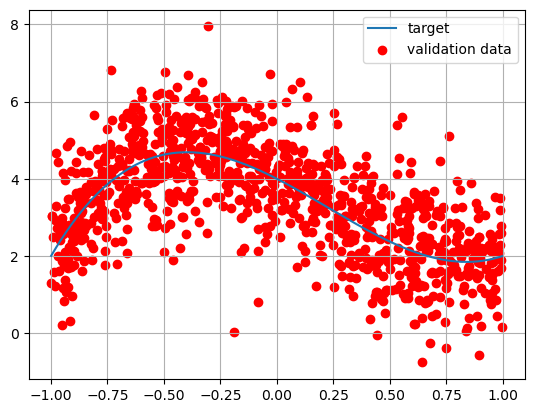

In [18]:
# plot validation and target dataset
y_target = function(x_valid) # ideal (target) linear function

import matplotlib.pyplot as plt
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

We now compose our NN.

We use <font color='red'>Keras</font> and we import its <font color='red'>Sequential model</font>. A model is a container of one or more layer and the Sequential model is a linear stack of layer where each layer has exactly one input tensor and one output tensor.
The <font color='red'>Dense</font> class allows to add in sequence densely connected layers to our NN, and the <font color='red'>Activation</font> class which applies an activation function to an output.

In [19]:
# we import the libraries
import tensorflow as tf
from tensorflow import keras
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

# we import the Sequetial model from keras and the Dense class
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

The input layer has a single neuron fed with the independent variable set $X$.

In [36]:
model = tf.keras.Sequential()
# we add to the NN a densely-connected layer with 20 units with input shape 1:
model.add(Dense(20, input_shape=(1,), activation='relu'))
# we add another layer with 10 units, each connected to 20 outputs of previous layer
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='relu'))

We compile the model with the <font color='red'>.compile()</font> method where we specify the <font color='red'>optimizer</font>, the <font color='red'>loss</font> and the <font color='red'>metrics</font>.

In [37]:
# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

- <b>optimizer</b>: specifies the optimization algorithm used for searching the parameters that best fit our problem (e.g. sgd = stochastic gradient descent);
- <b>loss</b>: function to minimize during the optimization (e.g. mse = mean squared error);
- <b>metrics</b>: this object judges the performance of our model and is used to monitor the training.

In [38]:
# get a summary of our composed model
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 20)                40        
                                                                 
 dense_34 (Dense)            (None, 100)               2100      
                                                                 
 dense_35 (Dense)            (None, 100)               10100     
                                                                 
 dense_36 (Dense)            (None, 100)               10100     
                                                                 
 dense_37 (Dense)            (None, 50)                5050      
                                                                 
 dense_38 (Dense)            (None, 50)                2550      
                                                                 
 dense_39 (Dense)            (None, 50)               

To fit the problem we feed our NN with the training dataset $D_{train}$, we set a number of epochs and a batch size, which specifies the the number of samples per gradient update in each epoch.

In [39]:
_batch_size = 10
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=_batch_size, epochs=50,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/50
1000/1000 [==============================] - 9s 6ms/step - loss: 2.1640 - mse: 2.1640 - val_loss: 2.7528 - val_mse: 2.7528
Epoch 2/50
1000/1000 [==============================] - 6s 6ms/step - loss: 1.5697 - mse: 1.5697 - val_loss: 1.2763 - val_mse: 1.2763
Epoch 3/50
1000/1000 [==============================] - 6s 6ms/step - loss: 1.2895 - mse: 1.2895 - val_loss: 1.2437 - val_mse: 1.2437
Epoch 4/50
1000/1000 [==============================] - 5s 5ms/step - loss: 1.2425 - mse: 1.2425 - val_loss: 1.1785 - val_mse: 1.1785
Epoch 5/50
1000/1000 [==============================] - 5s 5ms/step - loss: 1.1505 - mse: 1.1505 - val_loss: 1.0703 - val_mse: 1.0703
Epoch 6/50
1000/1000 [==============================] - 6s 6ms/step - loss: 1.0878 - mse: 1.0878 - val_loss: 1.0304 - val_mse: 1.0304
Epoch 7/50
1000/1000 [==============================] - 6s 6ms/step - loss: 1.0571 - mse: 1.0571 - val_loss: 1.0260 - val_mse: 1.0260
Epoch 8/50
1000/1000 [==============================] - 6s 6ms

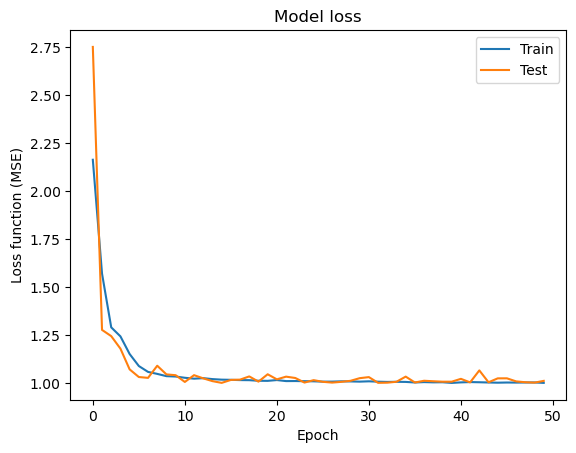

In [40]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss function (MSE)')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

4/4 [==============================] - 0s 6ms/step


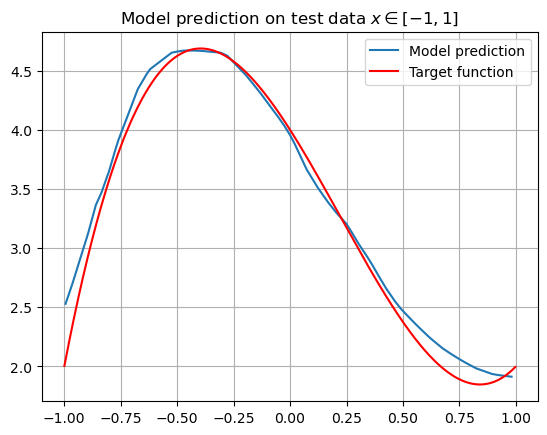

In [41]:
x_predicted = np.random.uniform(-1, 1, 100)
x_predicted.sort()
y_predicted = model.predict(x_predicted)
plt.plot(x_predicted, y_predicted,label='Model prediction')
plt.plot(x_valid, y_target,color='r',label='Target function')
plt.title('Model prediction on test data $x \in [-1,1]$')
plt.legend()
plt.grid(True)
plt.show()

If we consider points outside the $D_{train}$ range (e.g. $x \in [-2,-1] \cup [1,2])$ the model makes predictions which could slightly deviate from our target function...

4/4 [==============================] - 0s 7ms/step


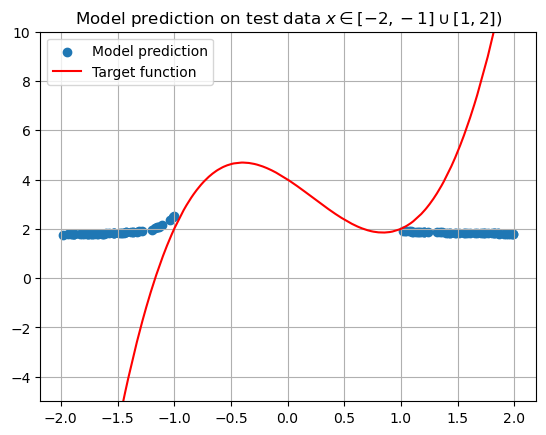

In [42]:
x_ofr_pos = np.random.uniform(1,2,50) # ofr = out of (training dataset) range
x_ofr_neg = np.random.uniform(-2,-1,50)

x = np.random.uniform(-2,2,200)
x.sort()
y_target = function(x)

x_ofr = np.concatenate((x_ofr_pos,x_ofr_neg))
# model prediction for out of range points
x_ofr.sort()
y_ofr = model.predict(x_ofr)
# target function for out of range points
plt.scatter(x_ofr, y_ofr,label='Model prediction')
plt.plot(x, y_target,color='r',label='Target function')
plt.title('Model prediction on test data $x \in [-2,-1] \cup [1,2])$')
plt.ylim(-5,10)
plt.legend()
plt.grid(True)
plt.show()

The reason is that the model can't recognize data from outside the $x$ range because we don't train it on that data.

### Exercise 11.3
  
Try to extend the model to fit a simple trigonometric 2D function such as $f(x,y) = \sin(x^2+y^2)$ in the range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.

In [179]:
import numpy as np

def fun(x,y):
    return np.sin(x*x+y*y)

In [180]:
np.random.seed(0)
x_train = np.random.uniform(-1.5, 1.5, 10000) # X training dataset
x_valid = np.random.uniform(-1.5, 1.5, 1000) # X validation dataset
y_train = np.random.uniform(-1.5, 1.5, 10000) # Y training dataset
y_valid = np.random.uniform(-1.5, 1.5, 1000) # Y validation dataset
#x_valid.sort()
#y_valid.sort()

sigma = 1.0 # noise standard deviation, for the moment it is absent
z_train = np.random.normal(fun(x_train, y_train), sigma) # actual measures from which we want to guess regression parameters
z_valid = np.random.normal(fun(x_valid, y_valid), sigma)

X = np.linspace(-1.5,1.5,100)
Y = np.linspace(-1.5,1.5,100)
z_target = fun(X,Y)
'''
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.plot(X,z_target)
ax2.plot(Y,z_target)
ax1.scatter(x_valid,z_valid,color='r')
ax2.scatter(y_valid,z_valid,color='r')

#ax1.spines[['left', 'bottom']].set_position('center')
#ax1.spines[['top', 'right']].set_visible(False)

ax1.set_xlabel(r'$x$')
ax1.set_ylabel(r'$f(x,y)$')
ax1.set_title('y-axis projection')
ax1.grid(True)

ax2.set_xlabel(r'$y$')
ax2.set_ylabel(r'$f(x,y)$')
ax2.set_title('x-axis projection')
ax2.grid(True)

plt.show()
'''

"\nfig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))\n\nax1.plot(X,z_target)\nax2.plot(Y,z_target)\nax1.scatter(x_valid,z_valid,color='r')\nax2.scatter(y_valid,z_valid,color='r')\n\n#ax1.spines[['left', 'bottom']].set_position('center')\n#ax1.spines[['top', 'right']].set_visible(False)\n\nax1.set_xlabel(r'$x$')\nax1.set_ylabel(r'$f(x,y)$')\nax1.set_title('y-axis projection')\nax1.grid(True)\n\nax2.set_xlabel(r'$y$')\nax2.set_ylabel(r'$f(x,y)$')\nax2.set_title('x-axis projection')\nax2.grid(True)\n\nplt.show()\n"

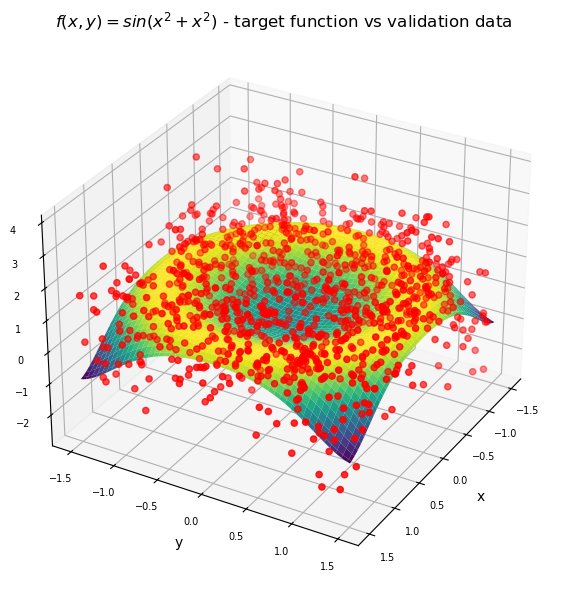

In [181]:
from mpl_toolkits.mplot3d import Axes3D

x, y = np.meshgrid(X, Y)

z = fun(x,y)

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

# Creare il plot della superficie
ax.plot_surface(x, y, z, cmap='viridis')
ax.scatter(x_valid,y_valid,z_valid,color='r')

# Etichette degli assi
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title(r'$f(x,y) = sin(x^2+x^2)$ - target function vs validation data')

ax.tick_params(axis='x', labelsize=7)  # Modifica la dimensione dei ticks dell'asse X
ax.tick_params(axis='y', labelsize=7)  # Modifica la dimensione dei ticks dell'asse Y
ax.tick_params(axis='z', labelsize=7)  # Modifica la dimensione dei ticks dell'asse Z

ax.view_init(elev=30, azim=30)

plt.tight_layout()

plt.show()

In [182]:
def create_model():
    model = Sequential()
    model.add(Dense(20, input_shape=(2,), activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(100, activation='tanh'))
    model.add(Dense(200, activation='relu'))
    model.add(Dense(200, activation='elu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(100, activation='tanh'))
    model.add(Dense(100, activation='elu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1, activation='tanh', name='output_layer'))

    return model

In [183]:
def compile_model():
    # create the model
    model=create_model()
    # compile the model
    model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

    return model

In [184]:
# training parameters
batch_size = 32
epochs = 70

# create the deep neural net
model_2DF = compile_model()

input_for_training = np.vstack((x_train, y_train)).T
input_for_validation = np.vstack((x_valid, y_valid)).T

history = model_2DF.fit(input_for_training, z_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(input_for_validation, z_valid))

Epoch 1/70
313/313 [==============================] - 2s 3ms/step - loss: 1.1506 - mse: 1.1506 - val_loss: 1.0890 - val_mse: 1.0890
Epoch 2/70
313/313 [==============================] - 1s 2ms/step - loss: 1.1252 - mse: 1.1252 - val_loss: 1.0670 - val_mse: 1.0670
Epoch 3/70
313/313 [==============================] - 1s 3ms/step - loss: 1.1004 - mse: 1.1004 - val_loss: 1.0283 - val_mse: 1.0283
Epoch 4/70
313/313 [==============================] - 1s 3ms/step - loss: 1.0670 - mse: 1.0670 - val_loss: 1.0076 - val_mse: 1.0076
Epoch 5/70
313/313 [==============================] - 1s 3ms/step - loss: 1.0501 - mse: 1.0501 - val_loss: 0.9847 - val_mse: 0.9847
Epoch 6/70
313/313 [==============================] - 1s 3ms/step - loss: 1.0433 - mse: 1.0433 - val_loss: 0.9926 - val_mse: 0.9926
Epoch 7/70
313/313 [==============================] - 1s 3ms/step - loss: 1.0298 - mse: 1.0298 - val_loss: 0.9736 - val_mse: 0.9736
Epoch 8/70
313/313 [==============================] - 1s 3ms/step - loss: 1.

32/32 [==============================] - 0s 2ms/step - loss: 0.9682 - mse: 0.9682

Test loss: 0.9681571125984192
Test accuracy: 0.9681571125984192


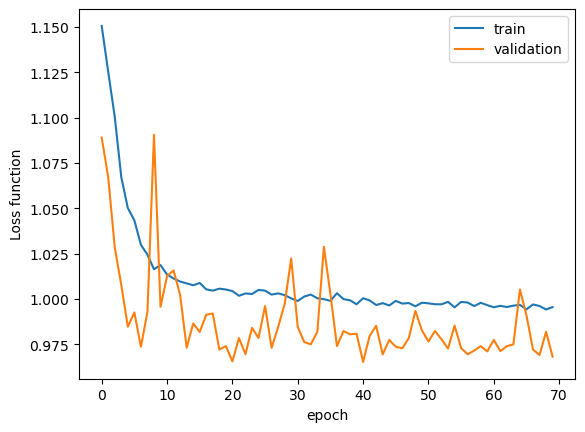

In [185]:
# evaluate model
score = model_2DF.evaluate(input_for_validation, z_valid, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history


plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.ylabel('Loss function')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='best')
plt.show()

In [196]:
x_predicted = np.random.uniform(-1.5, 1.5, 1000)
y_predicted = np.random.uniform(-1.5, 1.5, 1000)

# z_target = fun(x_predicted,y_predicted)

predicted_data = np.vstack((x_predicted, y_predicted)).T

z_predicted = model_2DF.predict(predicted_data)
'''
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.plot(x_predicted,z_target)
ax2.plot(y_predicted,z_target)
ax1.scatter(x_predicted,z_predicted,s=1,color='r')
ax2.scatter(y_predicted,z_predicted,s=1,color='r')

#ax1.spines[['left', 'bottom']].set_position('center')
#ax1.spines[['top', 'right']].set_visible(False)

ax1.set_xlabel(r'$x$')
ax1.set_ylabel(r'$f(x,y)$')
ax1.set_title('y-axis projection')
ax1.grid(True)

ax2.set_xlabel(r'$y$')
ax2.set_ylabel(r'$f(x,y)$')
ax2.set_title('x-axis projection')
ax2.grid(True)

plt.show()
'''

32/32 [==============================] - 0s 1ms/step


"\nfig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))\n\nax1.plot(x_predicted,z_target)\nax2.plot(y_predicted,z_target)\nax1.scatter(x_predicted,z_predicted,s=1,color='r')\nax2.scatter(y_predicted,z_predicted,s=1,color='r')\n\n#ax1.spines[['left', 'bottom']].set_position('center')\n#ax1.spines[['top', 'right']].set_visible(False)\n\nax1.set_xlabel(r'$x$')\nax1.set_ylabel(r'$f(x,y)$')\nax1.set_title('y-axis projection')\nax1.grid(True)\n\nax2.set_xlabel(r'$y$')\nax2.set_ylabel(r'$f(x,y)$')\nax2.set_title('x-axis projection')\nax2.grid(True)\n\nplt.show()\n"

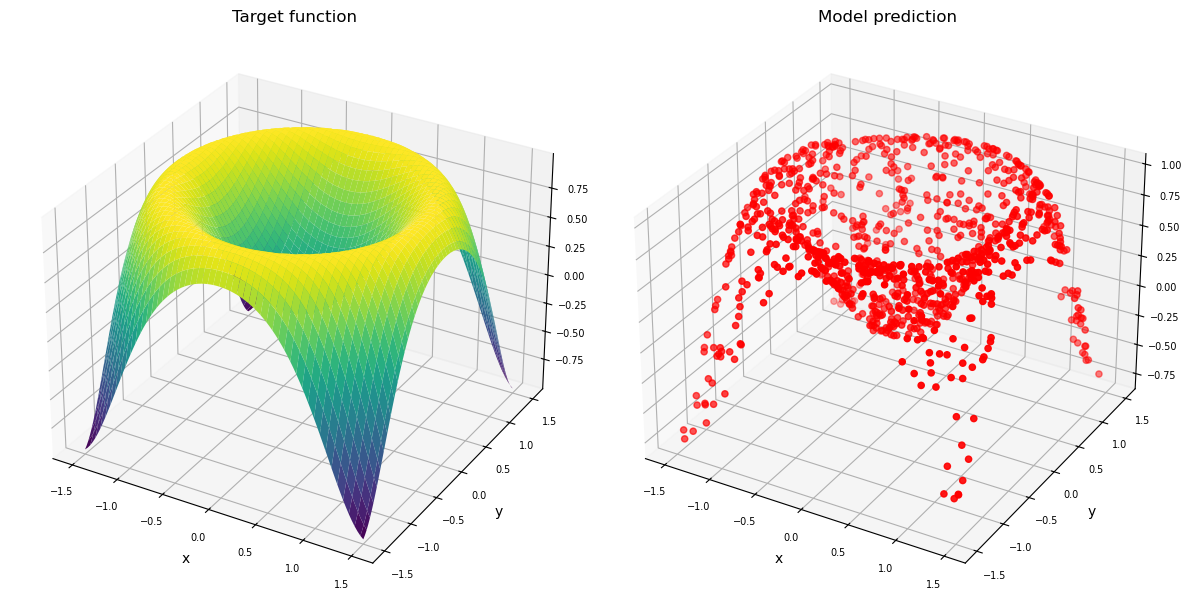

In [197]:
from mpl_toolkits.mplot3d import Axes3D

# x, y = np.meshgrid(x_predicted, y_predicted)

#z_target = fun(x,y)

fig = plt.figure(figsize=(12, 6))

ax = fig.add_subplot(121, projection='3d')
ax_ = fig.add_subplot(122, projection='3d')

ax.plot_surface(x,y,z,cmap='viridis')

# Etichette degli assi
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title(r'Target function')

ax.tick_params(axis='x', labelsize=7)  # Modifica la dimensione dei ticks dell'asse X
ax.tick_params(axis='y', labelsize=7)  # Modifica la dimensione dei ticks dell'asse Y
ax.tick_params(axis='z', labelsize=7)  # Modifica la dimensione dei ticks dell'asse Z

# ax.view_init(elev=30, azim=30)

ax_.scatter(x_predicted,y_predicted,z_predicted,color='r')

ax_.set_xlabel('x')
ax_.set_ylabel('y')
ax_.set_title(r'Model prediction')

ax_.tick_params(axis='x', labelsize=7)  # Modifica la dimensione dei ticks dell'asse X
ax_.tick_params(axis='y', labelsize=7)  # Modifica la dimensione dei ticks dell'asse Y
ax_.tick_params(axis='z', labelsize=7)  # Modifica la dimensione dei ticks dell'asse Z

plt.tight_layout()

plt.show()

Ideas to meditate on these exercises and judge your results can be found <a href=https://xkcd.com/2048/>here</a>